# CS658 Project: Group 8

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter

## Analysing the trends in the System Performance Status in terms of Consumed CPU Branches, Instructions and Cycles

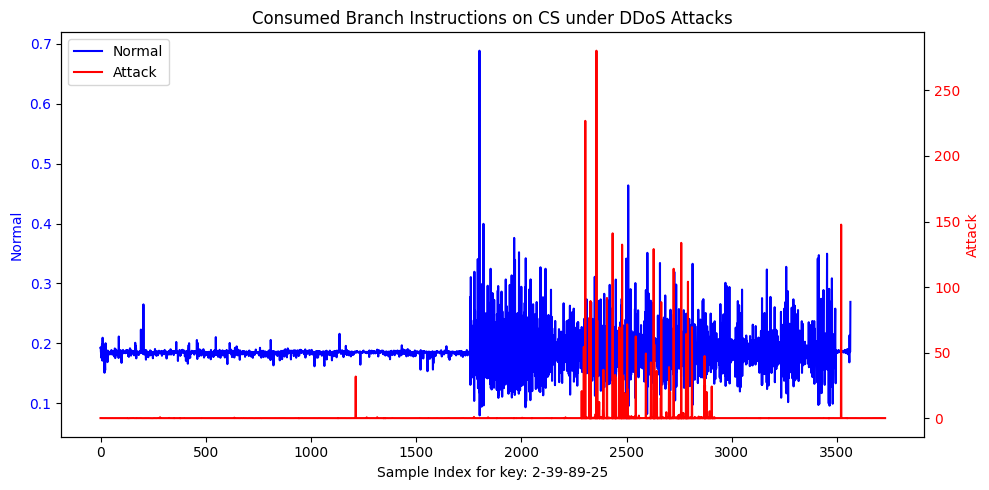

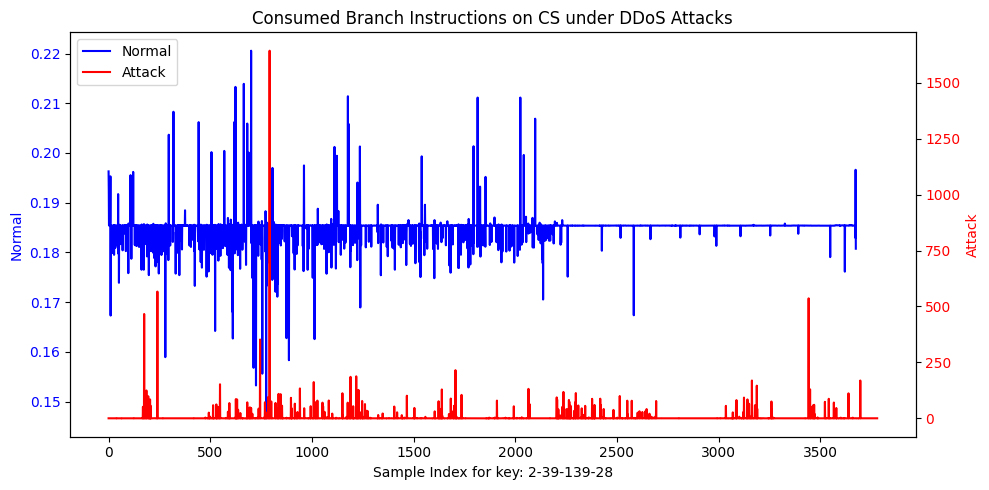

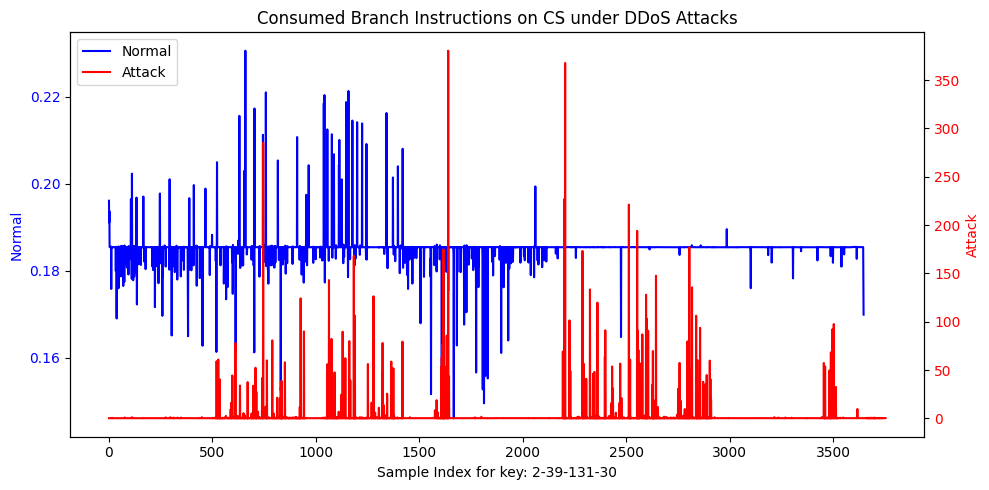

In [2]:
# Load the JSON data
with open('/kaggle/input/Dataset/Dataset/Wrong_CS_TS/Random_CS_Off/Gaussian_Off/STAT/CS/STAT.json', 'r') as file:
    data = json.load(file)

# Extract the required data
normal_counts = []
attack_counts = []

# Iterating through each key in the JSON data
for key, content in data.items():
    normal_count = content['branch']['normal']['data_point']
    attack_count = content['branch']['attack']['data_point']
    
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plotting the normal counts on the primary y-axis
    color = 'blue'
    ax1.set_xlabel('Sample Index for key: ' + key)
    ax1.set_ylabel('Normal', color=color)
    ax1.plot(normal_count, label='Normal', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for the attack counts
    ax2 = ax1.twinx()  
    color = 'red'
    ax2.set_ylabel('Attack', color=color)  
    ax2.plot(attack_count, label='Attack', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Consumed Branch Instructions on CS under DDoS Attacks')
    fig.tight_layout()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.show()

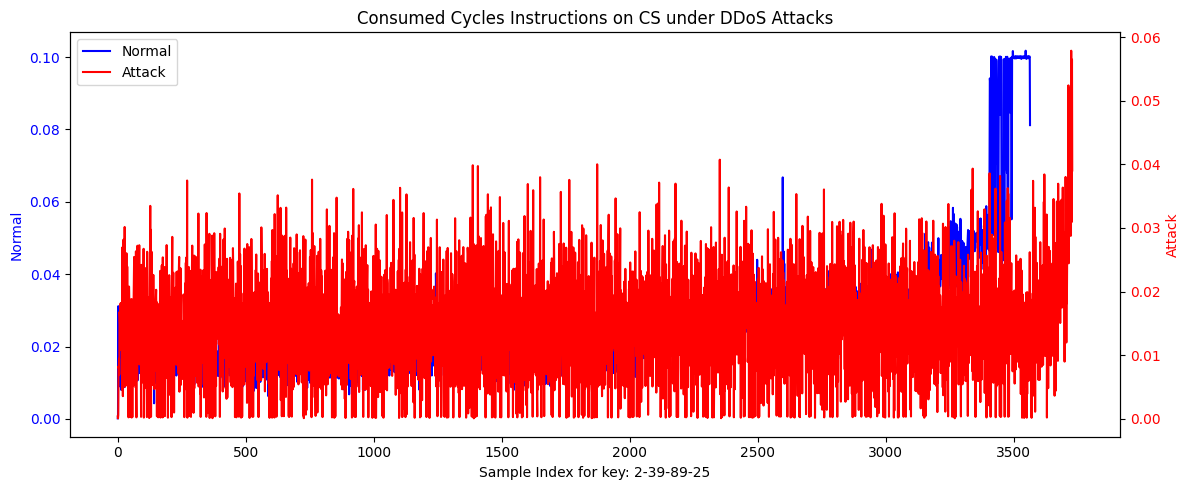

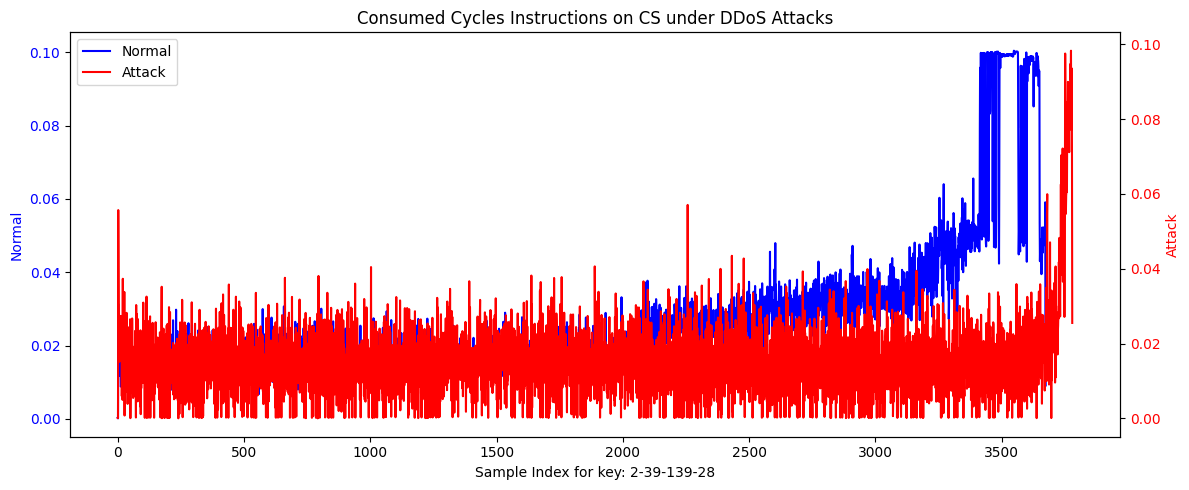

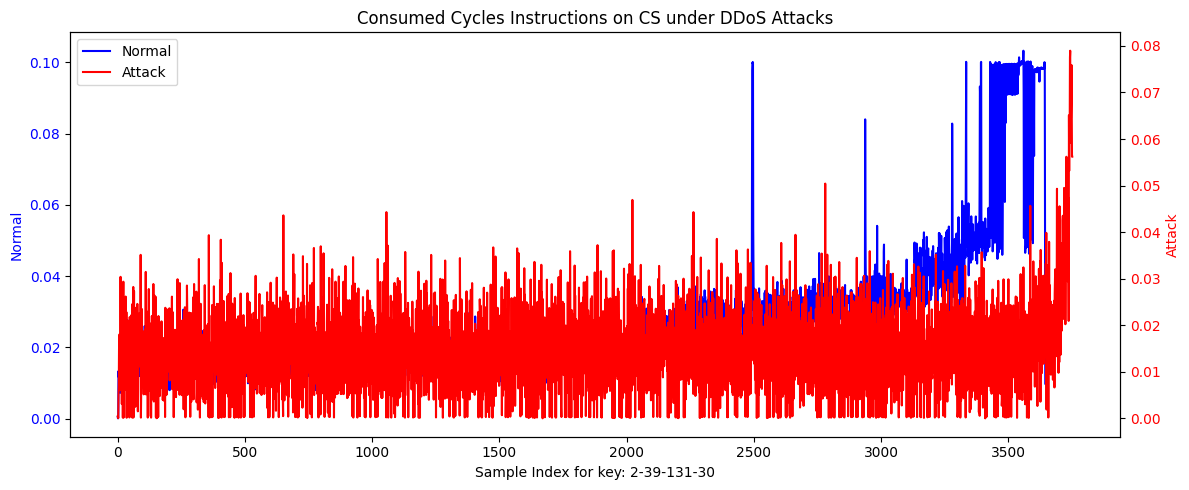

In [3]:
# Load the JSON data
with open('/kaggle/input/Dataset/Dataset/Wrong_CS_TS/Random_CS_Off/Gaussian_Off/STAT/CS/STAT.json', 'r') as file:
    data = json.load(file)

# Extract the required data
normal_counts = []
attack_counts = []

# Iterating through each key in the JSON data
for key, content in data.items():
    normal_count = content['cycles']['normal']['data_point']
    attack_count = content['cycles']['attack']['data_point']
    
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plotting the normal counts on the primary y-axis
    color = 'blue'
    ax1.set_xlabel('Sample Index for key: ' + key)
    ax1.set_ylabel('Normal', color=color)
    ax1.plot(normal_count, label='Normal', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for the attack counts
    ax2 = ax1.twinx()  
    color = 'red'
    ax2.set_ylabel('Attack', color=color)  
    ax2.plot(attack_count, label='Attack', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Consumed Cycles Instructions on CS under DDoS Attacks')
    fig.tight_layout()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.show()

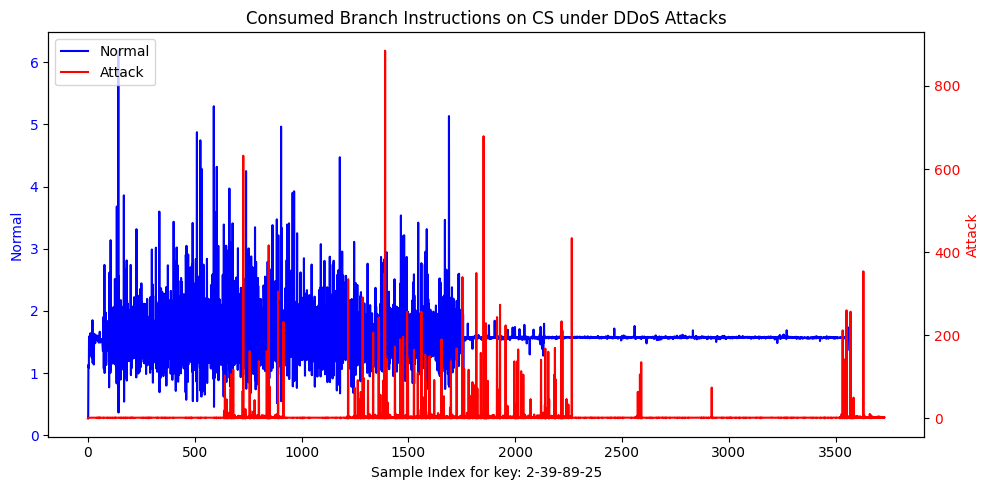

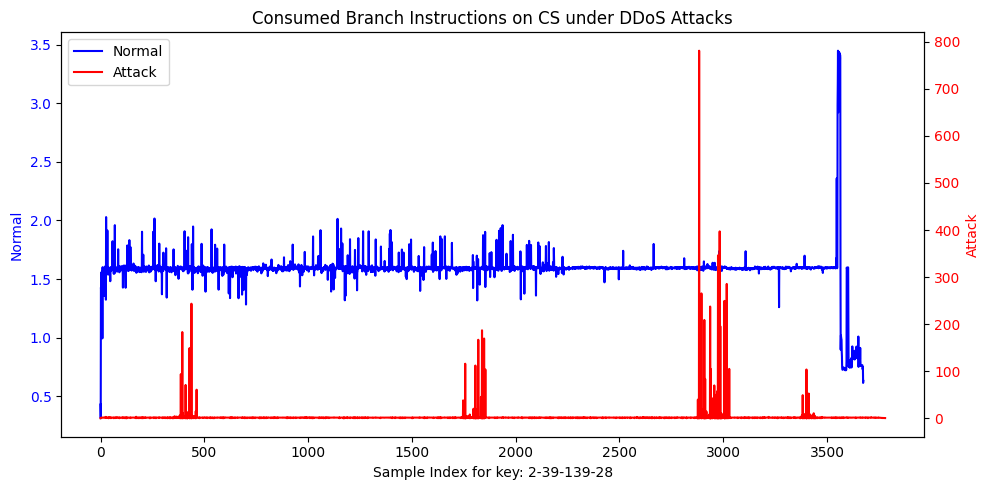

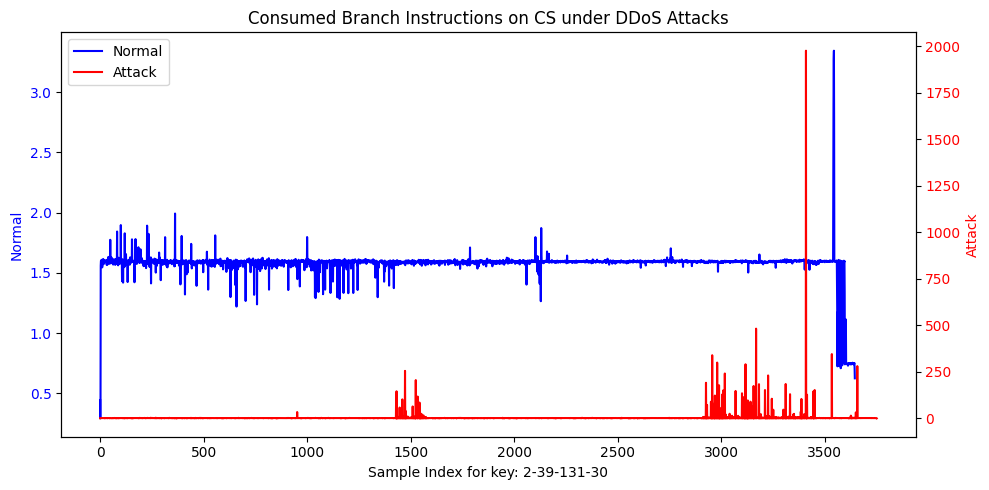

In [4]:
# Load the JSON data
with open('/kaggle/input/Dataset/Dataset/Wrong_CS_TS/Random_CS_Off/Gaussian_Off/STAT/CS/STAT.json', 'r') as file:
    data = json.load(file)

# Extract the required data
normal_counts = []
attack_counts = []

# Iterating through each key in the JSON data
for key, content in data.items():
    normal_count = content['instructions']['normal']['data_point']
    attack_count = content['instructions']['attack']['data_point']
    
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plotting the normal counts on the primary y-axis
    color = 'blue'
    ax1.set_xlabel('Sample Index for key: ' + key)
    ax1.set_ylabel('Normal', color=color)
    ax1.plot(normal_count, label='Normal', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for the attack counts
    ax2 = ax1.twinx()  
    color = 'red'
    ax2.set_ylabel('Attack', color=color)  
    ax2.plot(attack_count, label='Attack', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Consumed Branch Instructions on CS under DDoS Attacks')
    fig.tight_layout()

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.show()

## Analysing the trends in Linux kernel Overheads for Attack and Normal Scenarios

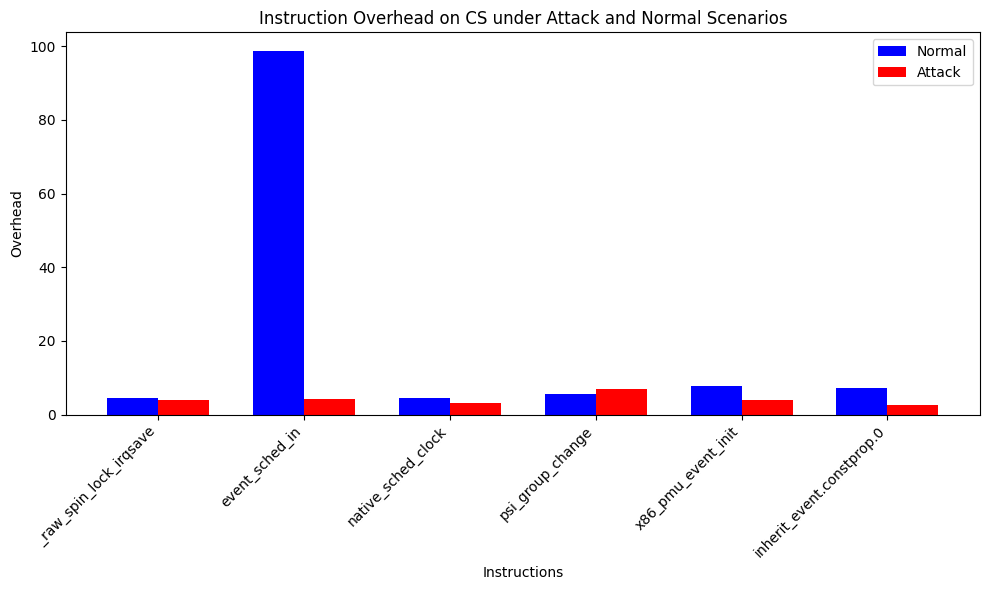

In [6]:
# Load JSON data
file_path = "/kaggle/input/Dataset/Dataset/Correct_ID/Random_CS_Off/Gaussian_Off/TOP/CS/TOP.json"  # Adjust the path as needed
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract instruction names from both attack and normal scenarios
attack_instructions = data["2-39-89-25"]["instructions"]["attack"]
normal_instructions = data["2-39-89-25"]["instructions"]["normal"]

# Count occurrences of instruction names in both scenarios
attack_counter = Counter(attack_instructions.keys())
normal_counter = Counter(normal_instructions.keys())

# Find the common instruction names in both attack and normal scenarios
common_instructions = set(attack_counter.keys()) & set(normal_counter.keys())

# Select the top 10 most common instructions based on frequency
top_instructions = list(common_instructions)[:10]

# Initialize lists to store mean overheads as percentages
attack_means = []
normal_means = []

# Retrieve data for each specified instruction
for instruction_name in top_instructions:
    # Check if instruction is available in both "attack" and "normal" scenarios
    if instruction_name in attack_instructions:
        attack_data = attack_instructions[instruction_name]
        attack_mean = np.mean(attack_data["data_point"]) if "data_point" in attack_data else 0
        attack_means.append(attack_mean)  # Multiply by 100 to convert to percentage
    else:
        attack_means.append(0)

    if instruction_name in normal_instructions:
        normal_data = normal_instructions[instruction_name]
        normal_mean = np.mean(normal_data["data_point"]) if "data_point" in normal_data else 0
        normal_means.append(normal_mean)  # Multiply by 100 to convert to percentage
    else:
        normal_means.append(0)

# Plotting
x = np.arange(len(top_instructions))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, normal_means, width, label='Normal', color='blue')
bars2 = ax.bar(x + width/2, attack_means, width, label='Attack', color='red')

ax.set_xlabel("Instructions")
ax.set_ylabel("Overhead")
ax.set_title("Instruction Overhead on CS under Attack and Normal Scenarios")
ax.set_xticks(x)
ax.set_xticklabels(top_instructions, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


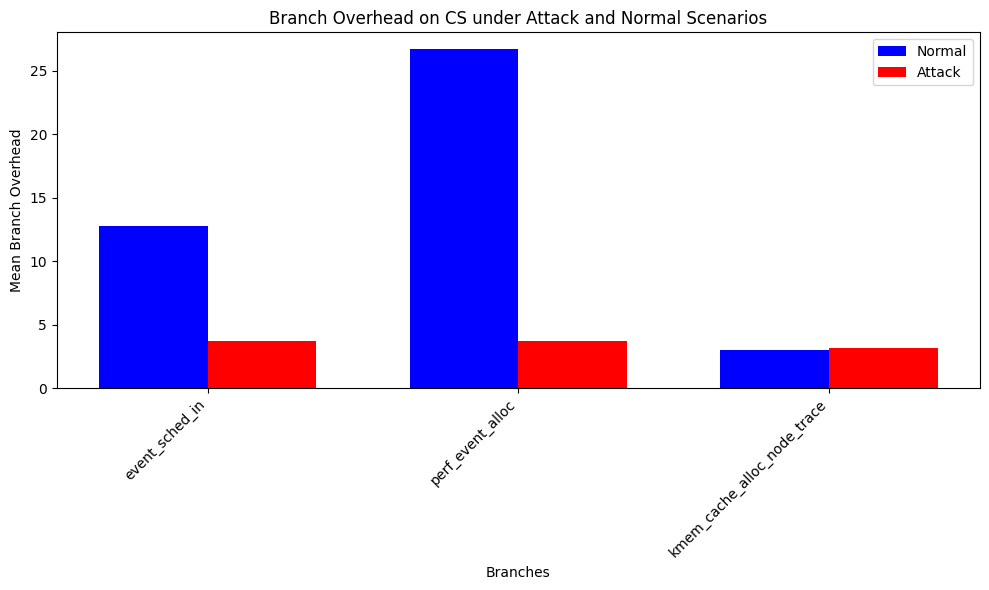

In [6]:
# Load JSON data
file_path = "/kaggle/input/Dataset/Dataset/Wrong_CS_TS/Random_CS_Off/Gaussian_Off/TOP/CS/TOP.json"
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract branch data for both attack and normal scenarios
attack_branches = data["2-39-89-25"]["branch"]["attack"]
normal_branches = data["2-39-89-25"]["branch"]["normal"]

# Count occurrences of branch names in both scenarios
attack_counter = Counter(attack_branches.keys())
normal_counter = Counter(normal_branches.keys())

# Find common branch names between attack and normal scenarios
common_branches = set(attack_counter.keys()) & set(normal_counter.keys())

# Select the top 10 most common branches based on frequency
top_branches = list(common_branches)[:10]

# Initialize lists to store mean overheads
attack_means = []
normal_means = []

# Retrieve data for each specified branch
for branch_name in top_branches:
    # Get mean for attack data if available
    if branch_name in attack_branches:
        attack_data = attack_branches[branch_name]
        attack_means.append(np.mean(attack_data["data_point"]) if "data_point" in attack_data else 0)
    else:
        attack_means.append(0)

    # Get mean for normal data if available
    if branch_name in normal_branches:
        normal_data = normal_branches[branch_name]
        normal_means.append(np.mean(normal_data["data_point"]) if "data_point" in normal_data else 0)
    else:
        normal_means.append(0)

# Plotting
x = np.arange(len(top_branches))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, normal_means, width, label='Normal', color='blue')
bars2 = ax.bar(x + width/2, attack_means, width, label='Attack', color='red')

ax.set_xlabel("Branches")
ax.set_ylabel("Mean Branch Overhead")
ax.set_title("Branch Overhead on CS under Attack and Normal Scenarios")
ax.set_xticks(x)
ax.set_xticklabels(top_branches, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Analysis of Time Delta Data (TIME_DELTA)

In [7]:
df_td = pd.read_csv('/kaggle/input/TD.csv')
df_td

,id,condition,mean_time_diff,max_time_diff,min_time_diff,std_time_diff,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,0.169743,0.589876,0.013684,0.081714,2212,382.171741,5.787974
1,2-39-89-25,normal,1.603092,31.381200,0.048210,3.324224,213,404.289015,0.526851
2,2-39-139-28,attack,0.163890,0.532747,0.010949,0.084633,2323,382.171741,6.078419
3,2-39-139-28,normal,1.064143,16.803731,0.014294,2.038581,324,404.289015,0.801407
4,2-39-131-30,attack,0.169471,0.523580,0.015481,0.085875,2244,382.171741,5.871706
...,...,...,...,...,...,...,...,...,...
79,2-39-89-25,normal,0.115577,2.262473,0.003476,0.239665,213,52.198878,4.080547
80,2-39-139-28,attack,0.082214,0.403133,0.010702,0.065704,323,27.553221,11.722767
81,2-39-139-28,normal,0.076721,1.211489,0.001031,0.146974,324,52.198878,6.207030
82,2-39-131-30,attack,0.093907,0.404044,0.011652,0.065089,253,27.553221,9.182230


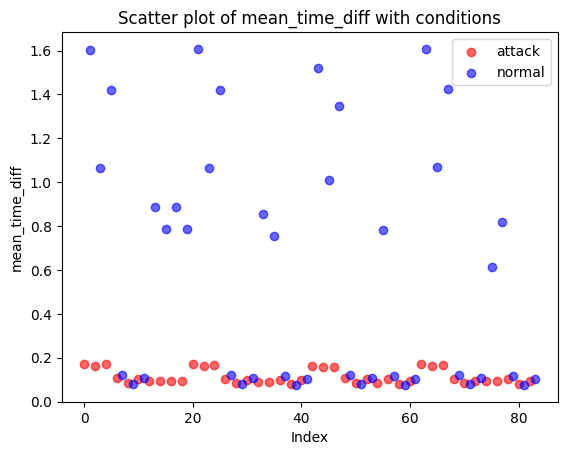

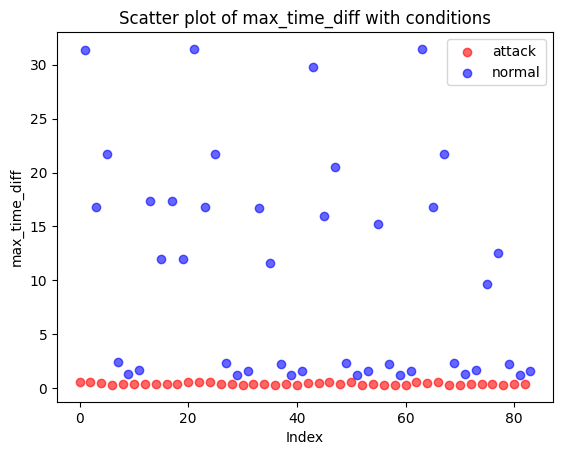

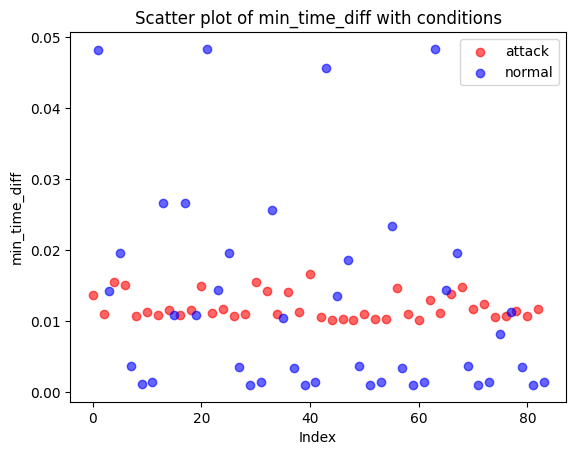

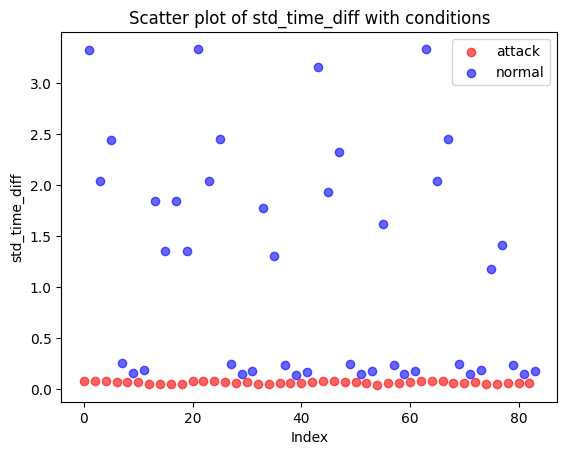

In [8]:
# Defining the features to plot
features = ['mean_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df_td['condition'].unique():
        condition_data = df_td[df_td['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

## Counts Analysis of Time Delta Data to check for Balancing

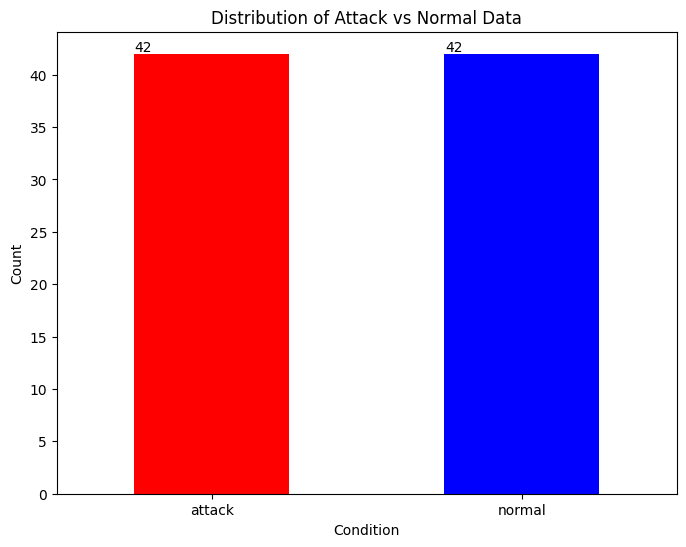

In [9]:
plt.figure(figsize=(8, 6))
ax = df_td['condition'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Attack vs Normal Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding the text annotations on the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


## Analysis of System Perfomance Status Data (STAT)

In [10]:
df_stat = pd.read_csv('/kaggle/input/Stat.csv')
df_stat

,id,condition,mean_stat,max_stat,min_stat,std_stat,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,0.996202,190.782877,0.000181,8.091443,3720,382.171741,9.733844
1,2-39-89-25,normal,0.185249,0.239669,0.129420,0.003006,3569,404.289015,8.827843
2,2-39-139-28,attack,1.737297,453.589265,0.000142,13.981088,3774,382.171741,9.875141
3,2-39-139-28,normal,0.184918,0.227282,0.144523,0.003615,3677,404.289015,9.094979
4,2-39-131-30,attack,2.489758,294.293342,0.000206,15.729606,3762,382.171741,9.843742
...,...,...,...,...,...,...,...,...,...
111,2-39-139-28,normal,0.181752,0.202069,0.143711,0.007146,478,52.198878,9.157285
112,2-39-131-30,attack,0.176157,0.223416,0.122802,0.010523,242,27.553221,8.783002
113,2-39-131-30,normal,0.183844,0.732917,0.134430,0.027733,436,52.198878,8.352670
114,GS_1,attack,0.187979,0.587974,0.080395,0.045712,250,27.553221,9.073349


In [11]:
df_stat_cs = df_stat[df_stat['id'] != 'GS_1']
df_stat_cs = df_stat_cs.reset_index(drop=True)
df_stat_cs

,id,condition,mean_stat,max_stat,min_stat,std_stat,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,0.996202,190.782877,0.000181,8.091443,3720,382.171741,9.733844
1,2-39-89-25,normal,0.185249,0.239669,0.129420,0.003006,3569,404.289015,8.827843
2,2-39-139-28,attack,1.737297,453.589265,0.000142,13.981088,3774,382.171741,9.875141
3,2-39-139-28,normal,0.184918,0.227282,0.144523,0.003615,3677,404.289015,9.094979
4,2-39-131-30,attack,2.489758,294.293342,0.000206,15.729606,3762,382.171741,9.843742
...,...,...,...,...,...,...,...,...,...
79,2-39-89-25,normal,0.187943,1.447807,0.147946,0.077059,410,52.198878,7.854575
80,2-39-139-28,attack,0.179400,0.586240,0.031998,0.030793,267,27.553221,9.690337
81,2-39-139-28,normal,0.181752,0.202069,0.143711,0.007146,478,52.198878,9.157285
82,2-39-131-30,attack,0.176157,0.223416,0.122802,0.010523,242,27.553221,8.783002


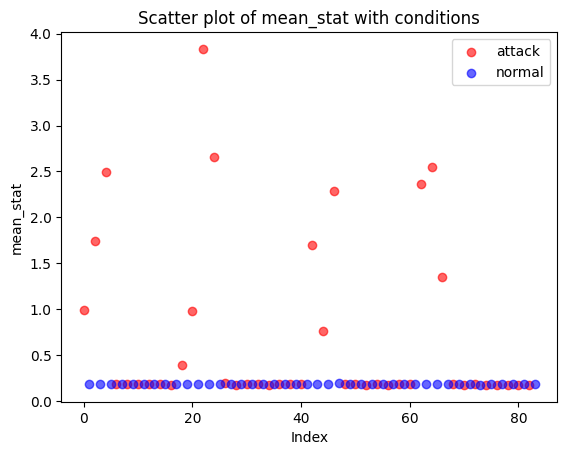

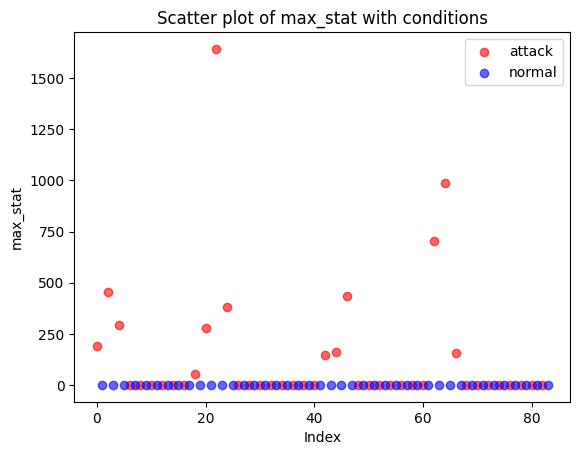

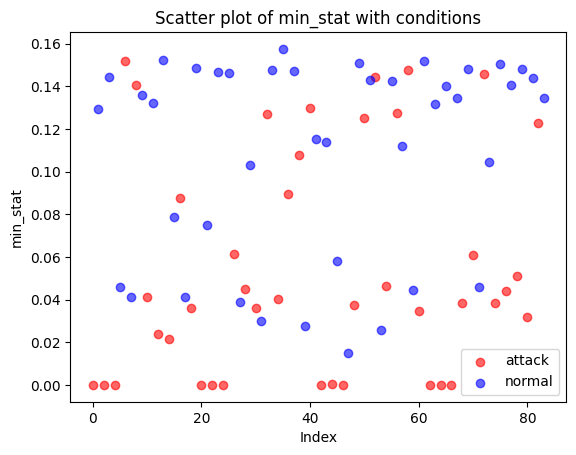

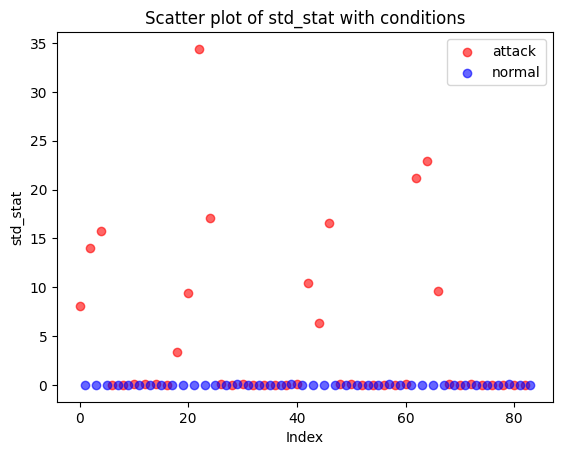

In [12]:
# Defining the features to plot
features = ['mean_stat', 'max_stat', 'min_stat', 'std_stat']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df_stat_cs['condition'].unique():
        condition_data = df_stat_cs[df_stat_cs['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

## Counts Analysis of System Performance Status Data to check for Balancing

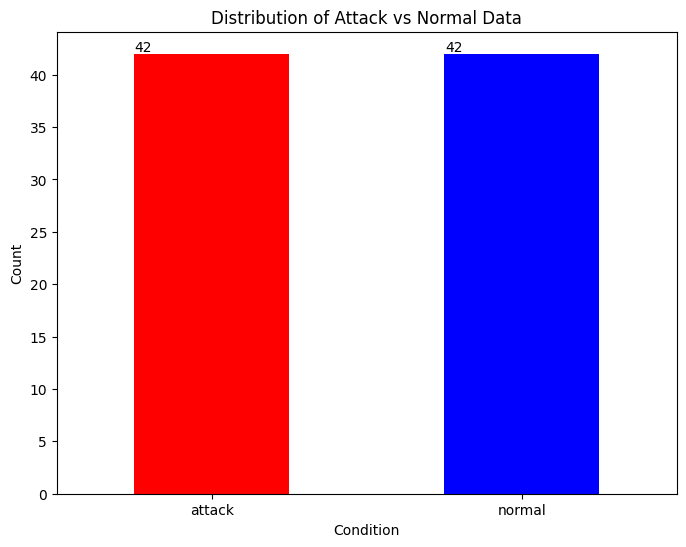

In [13]:
plt.figure(figsize=(8, 6))
ax = df_stat_cs['condition'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Attack vs Normal Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding the text annotations on the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


## Analysis of Top Linux Kernel Overhead Data (TOP)

In [14]:
df_top_cs = pd.read_csv('/kaggle/input/Top_CS.csv')
df_top_cs.dropna(inplace=True)
df_top_cs.reset_index(drop=True, inplace=True)
df_top_cs

,id,condition,type,field,mean_top,max_top,min_top,std_top,sampling_count,simulation_time,sampling_resolution
0,2-39-89-25,attack,branch,ctx_sched_in,5.199200,30.25,2.44,4.847433,50,382.171741,0.130831
1,2-39-89-25,attack,branch,psi_group_change,10.306629,95.91,0.18,8.803016,350,382.171741,0.915819
2,2-39-89-25,attack,branch,visit_groups_merge.constprop.0.is,4.585862,19.04,1.98,3.356524,29,382.171741,0.075882
3,2-39-89-25,attack,branch,__update_load_avg_se,2.655700,10.28,0.03,2.114887,100,382.171741,0.261662
4,2-39-89-25,attack,branch,kmem_cache_alloc_node,4.839938,33.33,0.24,4.866055,161,382.171741,0.421277
...,...,...,...,...,...,...,...,...,...,...,...
1438,2-39-139-28,normal,instructions,kfree,3.739286,6.32,1.79,1.533505,14,52.198878,0.268205
1439,2-39-131-30,attack,cycles,syscall_exit_to_user_mode,38.050000,38.05,38.05,0.000000,2,27.553221,0.072587
1440,2-39-131-30,normal,cycles,syscall_exit_to_user_mode,8.340000,15.37,4.04,4.385516,5,52.198878,0.095787
1441,2-39-131-30,attack,instructions,kfree,7.907500,8.45,7.43,0.553918,4,27.553221,0.145174


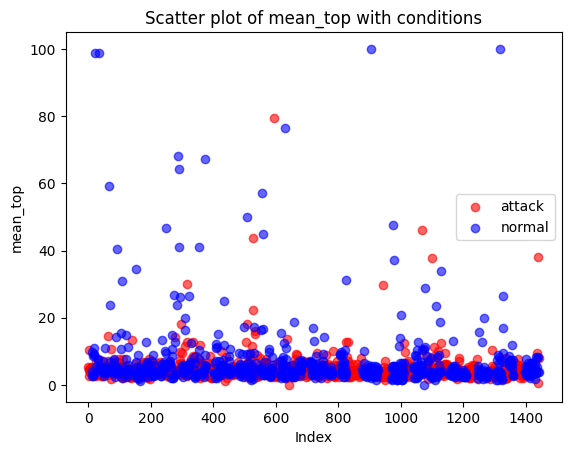

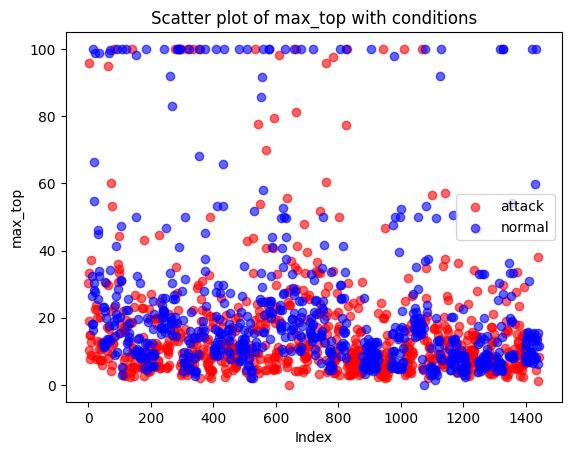

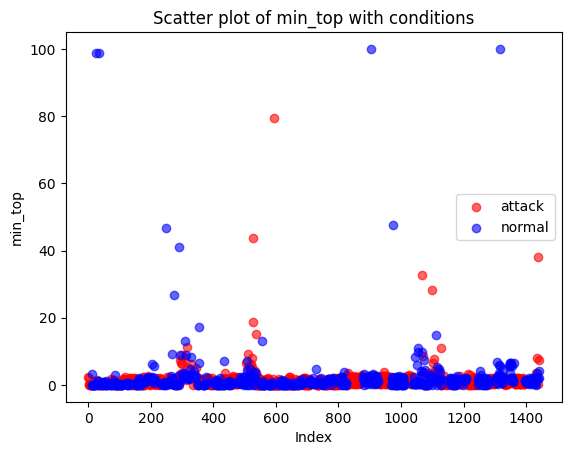

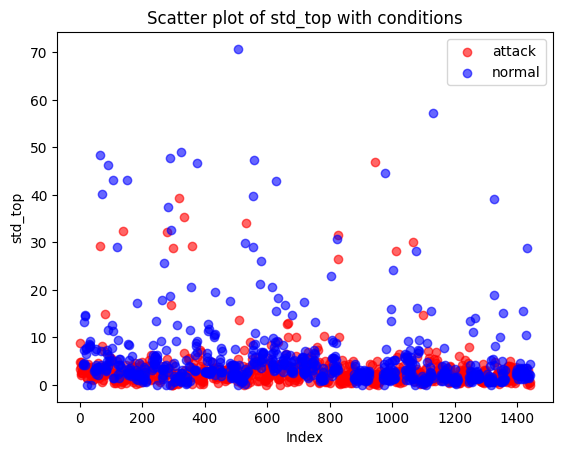

In [15]:
# Defining the features to plot
features = ['mean_top', 'max_top', 'min_top', 'std_top']

# Assign colors to the conditions
colors = {'attack': 'red', 'normal': 'blue'}

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    for condition in df_top_cs['condition'].unique():
        condition_data = df_top_cs[df_top_cs['condition'] == condition]
        plt.scatter(condition_data.index, condition_data[feature], color=colors[condition], label=condition, alpha=0.6)
    plt.title(f'Scatter plot of {feature} with conditions')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

## Counts Analysis of Top Linux Kernel Overhead Data to check for Balancing

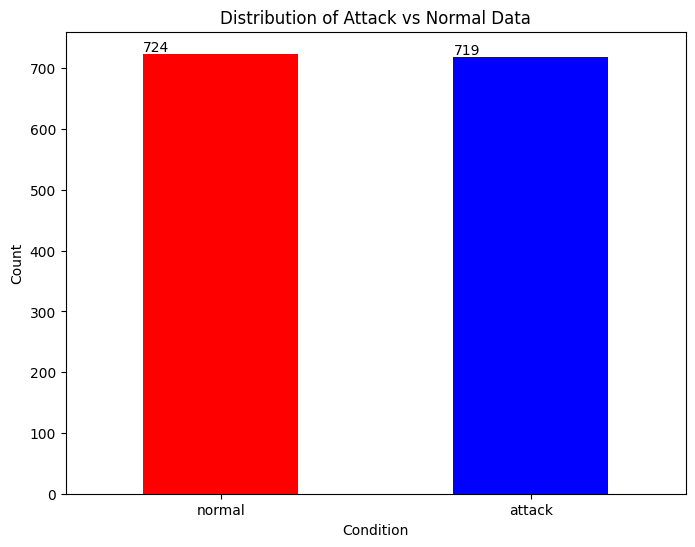

In [16]:
plt.figure(figsize=(8, 6))
ax = df_top_cs['condition'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Attack vs Normal Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding the text annotations on the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


## 5-Fold Cross Validation of a Model Trained on TOP Data to check for overfitting

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

# Load the data
df = df_top_cs.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1).values  # Convert to numpy array
y = df['condition'].values  # Convert to numpy array

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the k-fold cross-validation parameters
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
loss_per_fold = []
acc_per_fold = []
f1_scores = []

for train, test in kf.split(X, y):
    # Define the model architecture
    model = Sequential([
        Dense(60, input_shape=(X.shape[1],), activation='relu'),
        Dropout(0.5),
        Dense(30, activation='relu'),
        Dropout(0.5),
        Dense(15, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    print(f'Training for fold {fold_no} ...')
    history = model.fit(X[train], y[train], 
                        batch_size=32, epochs=100, verbose=1)
    
    # Evaluate the model on test data
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1] * 100)

    # Predictions and F1 score
    y_pred = (model.predict(X[test]) > 0.5).astype("int32")
    f1 = f1_score(y[test], y_pred)
    f1_scores.append(f1)

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1 Score: {f1_scores[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print(f'> F1 Score: {np.mean(f1_scores):.2f}')
print('------------------------------------------------------------------------')


Training for fold 1 ...
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4861 - loss: 0.7447
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5087 - loss: 0.7343
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 0.6944
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 0.6998
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5340 - loss: 0.6966
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6933
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.6810
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5252 - loss: 0.6871
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 0.6796
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.6755
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 0.6783
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - lo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5055 - loss: 0.7278
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4849 - loss: 0.7043
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5162 - loss: 0.7012
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 0.6908
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 0.6946
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5436 - loss: 0.6878
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 0.6922
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 0.6774
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.6809
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 - loss: 0.6921
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5573 - loss: 0.6731
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - lo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5034 - loss: 0.7441
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5113 - loss: 0.6981
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.6960
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5505 - loss: 0.6995
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 0.6916
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.6893
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5383 - loss: 0.6873
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5175 - loss: 0.6851
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 0.6783
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.6781
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5482 - loss: 0.6853
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5706 - lo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4635 - loss: 0.8843
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 0.7695
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4946 - loss: 0.7289
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5043 - loss: 0.7072
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5228 - loss: 0.7011
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 0.7059
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5322 - loss: 0.7002
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5725 - loss: 0.6813
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5789 - loss: 0.6829
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 0.6830
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5322 - loss: 0.6726
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5475 - lo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4917 - loss: 0.7093
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.7074
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 0.6999
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5455 - loss: 0.6856
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5520 - loss: 0.6855
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5315 - loss: 0.6864
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 0.6747
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5504 - loss: 0.6830
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5558 - loss: 0.6816
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5856 - loss: 0.6731
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - loss: 0.6731
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5618 - lo

## Model Evaluation for TOP Data using FFN + Adam Optimiser

Epoch 1/250


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5291 - loss: 0.7195 - val_accuracy: 0.6012 - val_loss: 0.6874
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5263 - loss: 0.6916 - val_accuracy: 0.5954 - val_loss: 0.6845
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5172 - loss: 0.7037 - val_accuracy: 0.6069 - val_loss: 0.6822
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5323 - loss: 0.7184 - val_accuracy: 0.6012 - val_loss: 0.6805
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5386 - loss: 0.6913 - val_accuracy: 0.6185 - val_loss: 0.6794
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5686 - loss: 0.6723 - val_accuracy: 0.6185 - val_loss: 0.6776
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5704 - loss: 0.6852 - val_accuracy: 0.6243 - val_loss: 0.6762
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4969 - loss: 0.7058 - val_accuracy: 0.6358 - val_loss: 0.

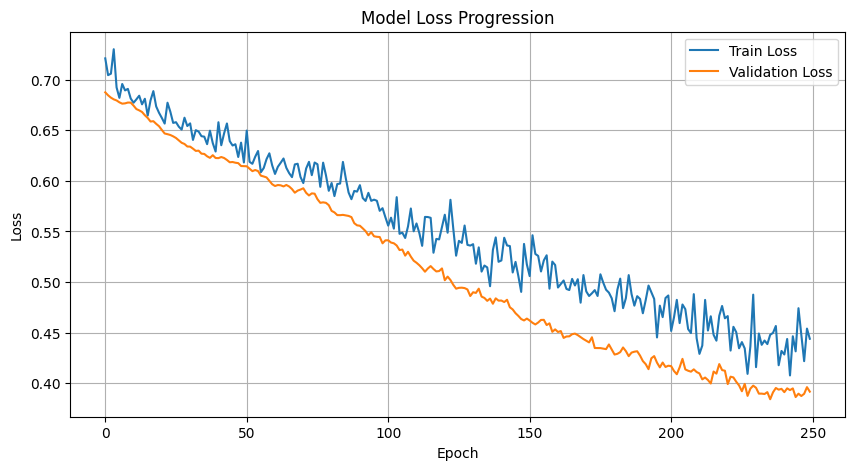

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Load the data
df = df_top_cs.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile the model with SGD
sgd_optimizer = SGD(learning_rate=0.001, momentum=0.9)  # You can adjust learning rate and momentum

# Build the neural network model
model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 60 units
model.add(Dropout(0.5))  # Dropout after input layer
model.add(Dense(30, activation='relu'))  # First hidden layer with 30 units
model.add(Dropout(0.5))  # Dropout after first hidden layer
model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 units
model.add(Dropout(0.5))  # Dropout after second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopper])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import classification_report, f1_score

# Predictions from the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(report)
print(f"F1 Score: {f1:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       281
           1       0.82      0.83      0.83       297

    accuracy                           0.82       578
   macro avg       0.82      0.82      0.82       578
weighted avg       0.82      0.82      0.82       578

F1 Score: 0.83


## Using TOP + STAT Data

In [20]:
df_combined_1 = pd.read_csv('/kaggle/input/Combined_wo_TD.csv')
df_combined_1.dropna(inplace=True)
df_combined_1.reset_index(drop=True, inplace=True)
df_combined_1.isnull().sum()

id           0
condition    0
type         0
field        0
mean_top     0
max_top      0
min_top      0
std_top      0
mean_stat    0
max_stat     0
min_stat     0
std_stat     0
dtype: int64

In [21]:
df_combined_1

,id,condition,type,field,mean_top,max_top,min_top,std_top,mean_stat,max_stat,min_stat,std_stat
0,2-39-89-25,attack,branch,dequeue_task_fair,3.476000,4.99,2.32,1.028752,0.996202,190.782877,0.000181,8.091443
1,2-39-89-25,attack,branch,___slab_alloc,3.957176,10.87,0.03,2.687817,0.996202,190.782877,0.000181,8.091443
2,2-39-89-25,attack,branch,intel_pmu_hw_config.part.0,3.775625,7.98,1.34,1.629376,0.996202,190.782877,0.000181,8.091443
3,2-39-89-25,attack,branch,ctx_sched_in,5.199200,30.25,2.44,4.847433,0.996202,190.782877,0.000181,8.091443
4,2-39-89-25,attack,branch,__mod_memcg_lruvec_state,3.351250,6.20,2.22,1.305499,0.996202,190.782877,0.000181,8.091443
...,...,...,...,...,...,...,...,...,...,...,...,...
6459,2-39-131-30,normal,instructions,merge_sched_in,3.527273,9.70,2.25,1.711736,0.183844,0.732917,0.134430,0.027733
6460,2-39-131-30,normal,instructions,syscall_return_via_sysret,4.421579,6.90,3.36,0.906135,0.183844,0.732917,0.134430,0.027733
6461,2-39-131-30,normal,instructions,psi_group_change,10.795349,17.41,6.28,3.045188,0.183844,0.732917,0.134430,0.027733
6462,2-39-131-30,normal,instructions,calc_timer_values,4.898333,6.38,3.84,0.799060,0.183844,0.732917,0.134430,0.027733


## 5-Fold Cross Validation of a Model Trained on TOP + STAT Data to check for overfitting

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

# Load the data
df = df_combined_1.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1).values  # Convert to numpy array
y = df['condition'].values  # Convert to numpy array

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the k-fold cross-validation parameters
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
loss_per_fold = []
acc_per_fold = []
f1_scores = []

for train, test in kf.split(X, y):
    # Define the model architecture
    model = Sequential([
        Dense(60, input_shape=(X.shape[1],), activation='relu'),
        Dropout(0.5),
        Dense(30, activation='relu'),
        Dropout(0.5),
        Dense(15, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    print(f'Training for fold {fold_no} ...')
    history = model.fit(X[train], y[train], 
                        batch_size=32, epochs=100, verbose=1)
    
    # Evaluate the model on test data
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1] * 100)

    # Predictions and F1 score
    y_pred = (model.predict(X[test]) > 0.5).astype("int32")
    f1 = f1_score(y[test], y_pred)
    f1_scores.append(f1)

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1 Score: {f1_scores[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print(f'> F1 Score: {np.mean(f1_scores):.2f}')
print('------------------------------------------------------------------------')


Training for fold 1 ...
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5992 - loss: 0.6519
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8263 - loss: 0.3924
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3236
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3225
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3207
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.3032
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3062
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.3002
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8829 - loss: 0.2806
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.2822
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8837 - loss: 0.2851
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5679 - loss: 0.6840
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.3873
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3454
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3235
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3036
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3114
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3057
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3001
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.2897
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.2834
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.2918
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7280 - loss: 0.5457
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3700
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3267
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3114
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3042
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3009
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.2857
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.2884
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.2851
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8824 - loss: 0.2913
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8905 - loss: 0.2703
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6155 - loss: 0.6700
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.4004
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3636
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3313
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3212
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3046
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.3052
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8857 - loss: 0.2899
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8871 - loss: 0.2912
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8889 - loss: 0.2884
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.2863
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6361 - loss: 0.6426
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3921
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3514
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3212
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3131
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3017
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3037
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.2866
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8837 - loss: 0.2865
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.2965
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.2894
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Model Evaluation for TOP + STAT Data using FFN + Adam Optimiser

Epoch 1/250


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6669 - loss: 0.6489 - val_accuracy: 0.7577 - val_loss: 0.4171
Epoch 2/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7796 - loss: 0.4479 - val_accuracy: 0.8544 - val_loss: 0.3311
Epoch 3/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.3885 - val_accuracy: 0.8905 - val_loss: 0.2946
Epoch 4/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.3443 - val_accuracy: 0.8930 - val_loss: 0.2816
Epoch 5/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.3266 - val_accuracy: 0.8930 - val_loss: 0.2779
Epoch 6/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.3205 - val_accuracy: 0.8943 - val_loss: 0.2760
Epoch 7/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3008 - val_accuracy: 0.8930 - val_loss: 0.2755
Epoch 8/250
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.3036 - val_accuracy: 0.8930 - val_loss: 0.2

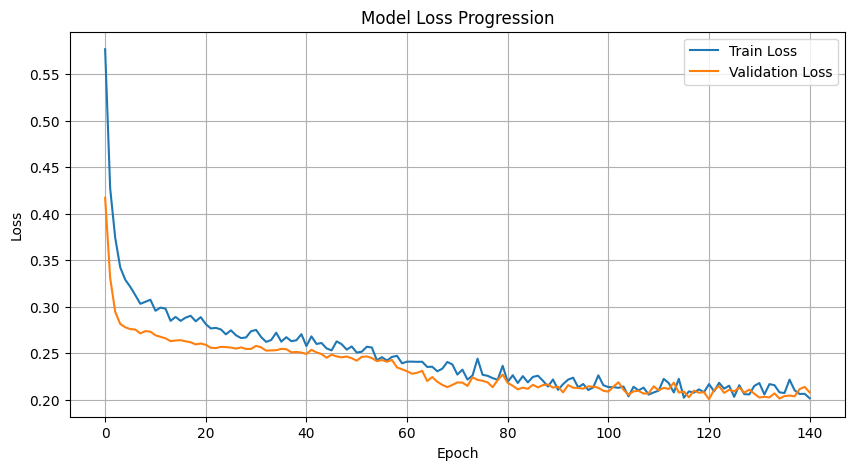

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Load the data
df = df_combined_1.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile the model with SGD
sgd_optimizer = SGD(learning_rate=0.001, momentum=0.9)  # You can adjust learning rate and momentum

# Build the neural network model
model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 60 units
model.add(Dropout(0.5))  # Dropout after input layer
model.add(Dense(30, activation='relu'))  # First hidden layer with 30 units
model.add(Dropout(0.5))  # Dropout after first hidden layer
model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 units
model.add(Dropout(0.5))  # Dropout after second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, callbacks = [early_stopper])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [24]:
from sklearn.metrics import classification_report, f1_score

# Predictions from the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(report)
print(f"F1 Score: {f1:.2f}")


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1976
           1       0.94      0.73      0.82       610

    accuracy                           0.93      2586
   macro avg       0.93      0.86      0.89      2586
weighted avg       0.93      0.93      0.92      2586

F1 Score: 0.82


## Using TOP + STAT + TIME_DELTA Data

In [25]:
df_combined = pd.read_csv('/kaggle/input/Combined.csv')
df_combined.dropna(inplace=True)
df_combined.reset_index(drop=True, inplace=True)
df_combined.isnull().sum()

id                0
condition         0
type              0
field             0
mean_top          0
max_top           0
min_top           0
std_top           0
mean_stat         0
max_stat          0
min_stat          0
std_stat          0
mean_time_diff    0
max_time_diff     0
min_time_diff     0
std_time_diff     0
dtype: int64

## 5-Fold Cross Validation of a Model Trained on TOP + STAT + TIME_DELTA Data to check for overfitting

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

# Load the data
df = df_combined.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1).values  # Convert to numpy array
y = df['condition'].values  # Convert to numpy array

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the k-fold cross-validation parameters
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
loss_per_fold = []
acc_per_fold = []
f1_scores = []

for train, test in kf.split(X, y):
    # Define the model architecture
    model = Sequential([
        Dense(60, input_shape=(X.shape[1],), activation='relu'),
        Dropout(0.5),
        Dense(30, activation='relu'),
        Dropout(0.5),
        Dense(15, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    print(f'Training for fold {fold_no} ...')
    history = model.fit(X[train], y[train], 
                        batch_size=32, epochs=100, verbose=1)
    
    # Evaluate the model on test data
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1] * 100)

    # Predictions and F1 score
    y_pred = (model.predict(X[test]) > 0.5).astype("int32")
    f1 = f1_score(y[test], y_pred)
    f1_scores.append(f1)

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - F1 Score: {f1_scores[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print(f'> F1 Score: {np.mean(f1_scores):.2f}')
print('------------------------------------------------------------------------')


Training for fold 1 ...
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6583 - loss: 0.6431
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9285 - loss: 0.2069
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0960
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0424
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0366
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0287
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0258
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0185
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0139
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0158
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0152
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7070 - loss: 0.6000
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.2167
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.0925
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.0650
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0420
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0307
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0245
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0155
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0144
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0102
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7084 - loss: 0.5763
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - loss: 0.1762
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0570
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9934 - loss: 0.0298
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0263
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0196
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0130
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0157
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0072
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0061
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6972 - loss: 0.5855
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8955 - loss: 0.2354
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1096
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0510
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0364
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0275
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0265
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0238
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0185
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.0176
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0135
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7244 - loss: 0.6527
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.2073
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0795
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0517
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0379
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0220
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.0189
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0204
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0121
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0111
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0087
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Model Evaluation for TOP + STAT + TIME_DELTA Data using FFN + Adam Optimiser

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7308 - loss: 0.6805 - val_accuracy: 0.8974 - val_loss: 0.3439
Epoch 2/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8190 - loss: 0.3878 - val_accuracy: 0.9727 - val_loss: 0.1684
Epoch 3/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8972 - loss: 0.2439 - val_accuracy: 0.9922 - val_loss: 0.0558
Epoch 4/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.1391 - val_accuracy: 0.9974 - val_loss: 0.0173
Epoch 5/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 6/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 9.6026e-04
Epoch 8/150
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss:

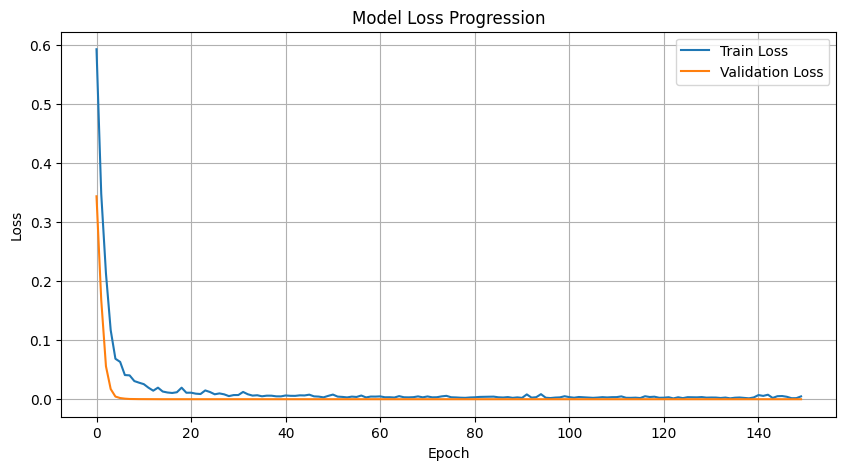

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Load the data
df = df_combined.copy()

# Drop unnecessary columns
df.drop(['id', 'type', 'field'], axis=1, inplace=True)

# Encode the 'condition' column (attack = 1, normal = 0)
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

# Separate features and labels
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile the model with SGD
sgd_optimizer = SGD(learning_rate=0.001, momentum=0.9)

# Build the neural network model
model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 60 units
model.add(Dropout(0.5))  # Dropout after input layer
model.add(Dense(30, activation='relu'))  # First hidden layer with 30 units
model.add(Dropout(0.5))  # Dropout after first hidden layer
model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 units
model.add(Dropout(0.5))  # Dropout after second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks = [early_stopper])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [28]:
from sklearn.metrics import classification_report, f1_score

# Predictions from the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(report)
print(f"F1 Score: {f1:.2f}")


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1961
           1       1.00      1.00      1.00       605

    accuracy                           1.00      2566
   macro avg       1.00      1.00      1.00      2566
weighted avg       1.00      1.00      1.00      2566

F1 Score: 1.00
